##### Dependencies

In [ ]:
import sys
sys.path.append('/functions.py')
from functions import * 

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
plt.rcParams.update({
    'font.family': 'Arial',       # Set default font to Arial
    'font.size': 12,               # Set default font size to 2
    'figure.figsize': (4, 4),     # Set default figure size to 4x4 inches
    'axes.labelweight': 'bold',   # Make axis labels bold
    'axes.titleweight': 'bold',   # Make title bold
    'axes.titlesize': 12,          # Set title size to 2
    'axes.labelsize': 12,          # Set axis label size to 2
    'xtick.labelsize': 12,         # Set x-tick label size to 2
    'ytick.labelsize': 12,         # Set y-tick label size to 2
    'xtick.major.width': 0.9,     # Increase tick width
    'ytick.major.width': 0.9,     # Increase tick width
    'xtick.major.size': 3,        # Increase tick size
    'ytick.major.size': 3,        # Increase tick size
    'axes.linewidth': 1.1,        # Set axis line width
    'font.weight': 'bold',        # Make all text bold
})

mpl.rcParams['pdf.fonttype'] = 42

##### Functions

In [3]:
def linear_correction(df, window_size=5000, intercept_val = 12.00):
    # Assuming your DataFrame is already loaded as df (df['time (seconds)'], df['force (pN)'])
    time = df['time (seconds)'].values
    force = df['force (pN)'].values

    # Step 1: Apply a rolling window to smooth the force data
    force_smooth = pd.Series(force).rolling(window=window_size, min_periods=1, center=True).mean().values

    # Step 2: Fit a linear line (linear regression) to the smoothed data
    slope, intercept = np.polyfit(time, force_smooth, 1)

    # Step 3: Calculate the linear drift component using the fitted line from smoothed data
    fitted_line = slope * time + intercept

    # Step 4: Correct the original force data (not the smoothed one) while keeping the intercept at 12
    initial_force_corrected = force[0]  # Starting force value of the original data
    force_corrected = force - (fitted_line - initial_force_corrected)

    # Step 5: Adjust the corrected force data so that its fitted line has an intercept at exactly 12
    corrected_slope, corrected_intercept = np.polyfit(time, force_corrected, 1)
    intercept_adjustment = intercept_val - corrected_intercept
    force_corrected += intercept_adjustment

    # Step 6: Refit the corrected data to check the new intercept
    final_corrected_slope, final_corrected_intercept = np.polyfit(time, force_corrected, 1)
    corrected_fitted_line = final_corrected_slope * time + final_corrected_intercept

    # Step 7: Plot the original force data, smoothed data, the fitted linear trend, and the corrected force data
    fig, ax = plt.subplots(3, 1, figsize=(6, 7))

    # Plot the original force data
    ax[0].plot(time, force, label="Original force", color='lightsteelblue', alpha=1)

    # Plot the smoothed force data
    ax[0].plot(time, force_smooth, label=f"Smoothed force", color='black', lw=1.5)

    # Plot the fitted linear trend
    ax[1].plot(time, force, label="Original force", color='lightsteelblue', alpha=1)
    ax[1].plot(time, fitted_line, label=f"Linear fit (y = {slope:.3f}x + {intercept:.2f})", color='purple', lw=2, linestyle='--')

    # Plot the corrected force data with its final fit
    ax[2].plot(time, force_corrected, label="Corrected force", color='lightgrey', alpha=1)
    ax[2].plot(time, corrected_fitted_line, label=f"Linear fit (y = {final_corrected_slope:.3f}x + {final_corrected_intercept:.2f})", color='purple', lw=2, linestyle='--')

    # Customize the plots
    ax[0].set_xlabel('Time (seconds)')
    ax[0].set_ylabel('Force (pN)')
    ax[0].set_ylim(8,15)
    #ax[0].set_xlim(10,200)
    ax[0].legend(frameon=False)

    ax[1].set_xlabel('Time (seconds)')
    ax[1].set_ylabel('Force (pN)')
    ax[1].set_ylim(8,15)
    #ax[1].set_xlim(10,200)
    ax[1].legend(frameon=False)

    ax[2].set_xlabel('Time (seconds)')
    ax[2].set_ylabel('Force (pN)')
    ax[2].set_ylim(8,15)
    #ax[2].set_xlim(10,200)
    ax[2].legend(frameon=False)

    #plt.suptitle('Force Over Time with Linear Drift Correction Using Smoothed Data')
    plt.tight_layout()
    plt.savefig('/Users/emily/Desktop/output.pdf', format='pdf')
    plt.show()

    # Optionally: Add the corrected force data back into the DataFrame
    df['force_corrected (pN)'] = force_corrected

    return df

In [4]:
def linear_correction_bp(df, window_size=5000):
    # Assuming your DataFrame is already loaded as df (df['time (seconds)'], df['force (pN)'])
    time = df['time'].values
    force = df['bp'].values

    # Step 1: Apply a rolling window to smooth the force data
    force_smooth = pd.Series(force).rolling(window=window_size, min_periods=1, center=True).mean().values

    # Step 2: Fit a linear line (linear regression) to the smoothed data
    slope, intercept = np.polyfit(time, force_smooth, 1)

    # Step 3: Calculate the linear drift component using the fitted line from smoothed data
    fitted_line = slope * time + intercept

    # Step 4: Correct the original force data (not the smoothed one) while keeping the intercept at 12
    initial_force_corrected = force[0]  # Starting force value of the original data
    force_corrected = force - (fitted_line - initial_force_corrected)

    # Step 5: Adjust the corrected force data so that its fitted line has an intercept at exactly 12
    corrected_slope, corrected_intercept = np.polyfit(time, force_corrected, 1)
    intercept_adjustment = 527 - corrected_intercept
    force_corrected += intercept_adjustment

    # Step 6: Refit the corrected data to check the new intercept
    final_corrected_slope, final_corrected_intercept = np.polyfit(time, force_corrected, 1)
    corrected_fitted_line = final_corrected_slope * time + final_corrected_intercept

    # Step 7: Plot the original force data, smoothed data, the fitted linear trend, and the corrected force data
    fig, ax = plt.subplots(3, 1, figsize=(7, 7))

    # Plot the original force data
    ax[0].plot(time, force, label="Original Force", color='black', alpha=0.5)

    # Plot the smoothed force data
    ax[0].plot(time, force_smooth, label=f"Smoothed Force (window={window_size})", color='green', lw=1.5)

    # Plot the fitted linear trend
    ax[1].plot(time, force, label="Original Force", color='black', alpha=0.5)
    ax[1].plot(time, fitted_line, label=f"Fitted Line (y = {slope:.3f}x + {intercept:.2f})", color='red', lw=2)

    # Plot the corrected force data with its final fit
    ax[2].plot(time, force_corrected, label="Corrected Force (Intercept at 12.00)", color='blue')
    ax[2].plot(time, corrected_fitted_line, label=f"Fit to Corrected Data (y = {final_corrected_slope:.3f}x + {final_corrected_intercept:.2f})", color='orange', lw=2, linestyle='--')

    # Customize the plots
    ax[0].set_xlabel('Time (seconds)')
    ax[0].set_ylabel('Force (pN)')
    ax[0].legend()

    ax[1].set_xlabel('Time (seconds)')
    ax[1].set_ylabel('Force (pN)')
    ax[1].legend()

    ax[2].set_xlabel('Time (seconds)')
    ax[2].set_ylabel('Force (pN)')
    ax[2].legend()

    plt.suptitle('Force Over Time with Linear Drift Correction Using Smoothed Data')
    plt.tight_layout()
    plt.show()

    # Optionally: Add the corrected force data back into the DataFrame
    df['bp_corrected'] = force_corrected

    return df

In [5]:
def linear_correction_flat(df, window_size=500000, forced_intercept=10.80):
    # Assuming your DataFrame is already loaded as df (df['time (seconds)'], df['force (pN)'])
    time = df['time (seconds)'].values
    force = df['force (pN)'].values

    # Step 1: Apply a rolling window to smooth the force data
    force_smooth = pd.Series(force).rolling(window=window_size, min_periods=1, center=True).mean().values

    # Step 2: Fit a linear regression to the smoothed force data
    slope, intercept = np.polyfit(time, force_smooth, 1)

    # Step 3: Create a linear line (fitted line) based on the smoothed force with the original slope and intercept
    fitted_line = slope * time + intercept

    # Step 4: Adjust the smoothed force data so that the intercept is set to the forced_intercept (e.g., 10.80)
    intercept_adjustment = forced_intercept - intercept
    corrected_fitted_line = fitted_line + intercept_adjustment

    # Step 5: Shift the original force data by the same intercept adjustment to correct it
    force_corrected = force + intercept_adjustment

    # Step 6: Plot the original force data, smoothed data, the fitted line (red), and the corrected force data (blue)
    fig, ax = plt.subplots(3, 1, figsize=(7, 7))

    # Plot the original force data
    ax[0].plot(time, force, label="Original Force", color='black', alpha=0.5)
    ax[0].plot(time, force_smooth, label=f"Smoothed Force (window={window_size})", color='green', lw=1.5)

    # Plot the red line (shifted) so that its intercept is at 10.80
    ax[1].plot(time, force, label="Original Force", color='black', alpha=0.5)
    ax[1].plot(time, corrected_fitted_line, label=f"Fitted Line with Forced Intercept (y = {forced_intercept:.2f})", color='red', lw=2)

    # Plot the corrected force data
    ax[2].plot(time, force_corrected, label="Corrected Force", color='blue')
    final_corrected_slope, final_corrected_intercept = np.polyfit(time, force_corrected, 1)
    ax[2].plot(time, final_corrected_slope * time + final_corrected_intercept, label=f"Fit to Corrected Data (y = {final_corrected_slope:.3f}x + {final_corrected_intercept:.2f})", color='orange', lw=2, linestyle='--')

    # Customize the plots
    ax[0].set_xlabel('Time (seconds)')
    ax[0].set_ylabel('Force (pN)')
    ax[0].legend()

    ax[1].set_xlabel('Time (seconds)')
    ax[1].set_ylabel('Force (pN)')
    ax[1].legend()

    ax[2].set_xlabel('Time (seconds)')
    ax[2].set_ylabel('Force (pN)')
    ax[2].legend()

    plt.suptitle('Force Over Time with Linear Drift Correction and Forced Intercept at 10.80')
    plt.tight_layout()
    plt.show()

    # Optionally: Add the corrected force data back into the DataFrame
    df['force_corrected (pN)'] = force_corrected

    return df


In [6]:
def downsample_bp(df, downsampling):
    df['time_delta'] = pd.to_timedelta(df['time'], unit='s')
    df.set_index('time_delta', inplace=True)

    # Downsample data to the specified interval
    downsampled_df = df.resample(downsampling).mean()  # e.g., '500000U' represents 500,000 microseconds (0.5 seconds)

    # Optionally, drop any rows with NaN values that might have been introduced
    downsampled_df.dropna(inplace=True)

    # Calculate the original temporal resolution in Hz
    original_resolution_s = (df['time'].iloc[1] - df['time'].iloc[0])
    original_resolution_hz = 1 / original_resolution_s

    # Calculate the downsample factor
    downsample_interval = pd.to_timedelta(downsampling).total_seconds()
    downsample_factor = downsample_interval / original_resolution_s

    # Calculate the new temporal resolution in Hz
    new_resolution_hz = 1 / downsample_interval

    print(f"Downsample factor: {downsample_factor:.2f}")
    print(f"Original temporal resolution: {original_resolution_hz:.2f} Hz")
    print(f"New temporal resolution: {new_resolution_hz:.2f} Hz")

    return downsampled_df


In [7]:
def downsample(df, downsampling):
    df['time_delta'] = pd.to_timedelta(df['time (seconds)'], unit='s')
    df.set_index('time_delta', inplace=True)

    # Downsample data to the specified interval
    downsampled_df = df.resample(downsampling).mean()  # e.g., '500000U' represents 500,000 microseconds (0.5 seconds)

    # Optionally, drop any rows with NaN values that might have been introduced
    downsampled_df.dropna(inplace=True)

    # Calculate the original temporal resolution in Hz
    original_resolution_s = (df['time (seconds)'].iloc[1] - df['time (seconds)'].iloc[0])
    original_resolution_hz = 1 / original_resolution_s

    # Calculate the downsample factor
    downsample_interval = pd.to_timedelta(downsampling).total_seconds()
    downsample_factor = downsample_interval / original_resolution_s

    # Calculate the new temporal resolution in Hz
    new_resolution_hz = 1 / downsample_interval

    print(f"Downsample factor: {downsample_factor:.2f}")
    print(f"Original temporal resolution: {original_resolution_hz:.2f} Hz")
    print(f"New temporal resolution: {new_resolution_hz:.2f} Hz")

    return downsampled_df


In [8]:
def smooth_and_shift_trace(df, start_time, end_time, window_size=20000, target_intercept=12.00):
    # Assuming your DataFrame is already loaded as df (df['time (seconds)'], df['force (pN)'])
    time = df['time (seconds)'].values
    force = df['force (pN)'].values

    # Step 1: Apply extreme smoothing to the force data
    force_smooth = pd.Series(force).rolling(window=window_size, min_periods=1, center=True).mean().values

    # Step 2: Select the range of the trace for fitting
    mask = (time >= start_time) & (time <= end_time)
    time_fit = time[mask]
    force_smooth_fit = force_smooth[mask]

    # Step 3: Fit a linear line (linear regression) to the smoothed data in the selected range
    slope, intercept = np.polyfit(time_fit, force_smooth_fit, 1)

    # Step 4: Calculate the linear drift component using the fitted line from the selected range
    fitted_line_fit_range = slope * time_fit + intercept

    # Step 5: Shift the entire force trace so that the fitted line intercepts at the target intercept (e.g., 12.00)
    intercept_adjustment = target_intercept - intercept
    force_corrected = force + intercept_adjustment

    # Step 6: Refit the corrected data to check the new slope and intercept (over the fitting range only)
    final_corrected_slope, final_corrected_intercept = np.polyfit(time_fit, force_corrected[mask], 1)
    corrected_fitted_line_fit_range = final_corrected_slope * time_fit + final_corrected_intercept

    # Step 7: Plot the original force data, smoothed data, the fitted line in the fit range, and the corrected force data
    fig, ax = plt.subplots(3, 1, figsize=(6, 7))

    # Plot the original force data and smoothed data
    ax[0].plot(time, force, label="Original Force", color='lightsteelblue', alpha=1)
    ax[0].plot(time, force_smooth, label=f"Smoothed Force (window={window_size})", color='black', lw=1.5)
    #ax[0].set_title("Original Force with Smoothing")
    ax[0].set_xlabel('Time (seconds)')
    ax[0].set_ylabel('Force (pN)')
    ax[0].set_ylim(8,15)
    #ax[0].set_xlim(0,160)
    ax[0].legend(frameon=False)

    # Plot the fitted line only within the selected fitting range
    ax[1].plot(time, force, label="Original Force", color='lightsteelblue', alpha=1)
    ax[1].plot(time_fit, fitted_line_fit_range, label=f"Fitted Line in Fit Range (y = {slope:.3f}x + {intercept:.2f})", color='purple', lw=2)
    ax[1].axvspan(start_time, end_time, color='yellow', alpha=0.2, label="Fit Range")  # Highlight fitting range
    #ax[1].set_title("Linear Fit in Selected Range")
    ax[1].set_xlabel('Time (seconds)')
    ax[1].set_ylabel('Force (pN)')
    ax[1].set_ylim(8,15)
    #ax[1].set_xlim(0,160)
    ax[1].legend(frameon=False)


    # Plot the corrected force data over the entire trace with the final fit (zero slope and intercept at target intercept)
    ax[2].plot(time, force_corrected, label=f"Corrected Force (Intercept at {target_intercept})", color='lightgrey')
    ax[2].plot(time, np.full_like(time, target_intercept), label=f"Expected Baseline (y = {target_intercept})", color='purple', lw=2, linestyle='--')
    #ax[2].set_title("Corrected Force over Entire Trace")
    ax[2].set_xlabel('Time (seconds)')
    ax[2].set_ylabel('Force (pN)')
    ax[2].set_ylim(8,15)
    #ax[2].set_xlim(75,160)
    ax[2].legend(frameon=False)


    # # Plot the corrected data fit in the same fitting range to confirm zero slope
    # ax[3].plot(time_fit, force_corrected[mask], label="Corrected Force (Fit Range)", color='blue', alpha=0.5)
    # ax[3].plot(time_fit, corrected_fitted_line_fit_range, label=f"Fit to Corrected Data (y = {final_corrected_slope:.3f}x + {final_corrected_intercept:.2f})", color='purple', lw=2)
    # ax[3].axhline(target_intercept, color='orange', linestyle='--', label=f"Target Intercept at {target_intercept}")
    # ax[3].set_title("Fit to Corrected Data in Fit Range (Expecting Zero Slope)")
    # ax[3].set_xlabel('Time (seconds)')
    # ax[3].set_ylabel('Force (pN)')
    # ax[3].legend()

    #plt.suptitle(f'Force Over Time with Linear Drift Correction (Intercept at {target_intercept})')
    plt.tight_layout()
    plt.savefig('/Users/emily/Desktop/output.pdf', format='pdf')
    plt.show()

    # Optionally: Add the corrected force data back into the DataFrame
    df['force_corrected (pN)'] = force_corrected

    return df


#### Files

In [ ]:
file_raw = pd.read_csv('/file.csv')

#### Formatting

In [30]:
file_formatted = downsample(file_raw, '5000us')

Downsample factor: 390.62
Original temporal resolution: 78125.00 Hz
New temporal resolution: 200.00 Hz


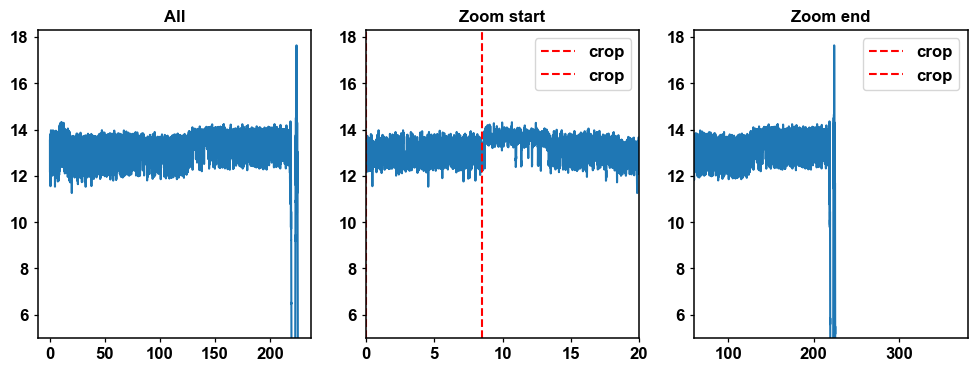

In [33]:
min = 0
max = 8.5

file = file_formatted
fig, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].plot(file['time (seconds)'], file['force (pN)'])
#ax[0].axvline(x=35, color='red', linestyle='--', label='crop')
ax[0].set_ylim(5,18.3)
ax[0].set_title('All')

ax[1].plot(file['time (seconds)'], file['force (pN)'])
ax[1].set_title('Zoom start')
ax[1].axvline(x=min, color='red', linestyle='--', label='crop')
ax[1].axvline(x=max, color='red', linestyle='--', label='crop')
ax[1].set_xlim(0, 20)
ax[1].set_ylim(5,18.3)
ax[1].legend()

ax[2].plot(file['time (seconds)'], file['force (pN)'])
ax[2].set_title('Zoom end')
ax[2].axvline(x=min, color='red', linestyle='--', label='crop')
ax[2].axvline(x=max, color='red', linestyle='--', label='crop')
ax[2].set_xlim(60, 380)
ax[2].set_ylim(5,18.3)
ax[2].legend()
plt.show()

In [34]:
file = downsample(file_raw, '500us')
file_cropped = file[(file['time (seconds)'] > min) & (file['time (seconds)'] < max)]

Downsample factor: 39.06
Original temporal resolution: 78125.00 Hz
New temporal resolution: 2000.00 Hz


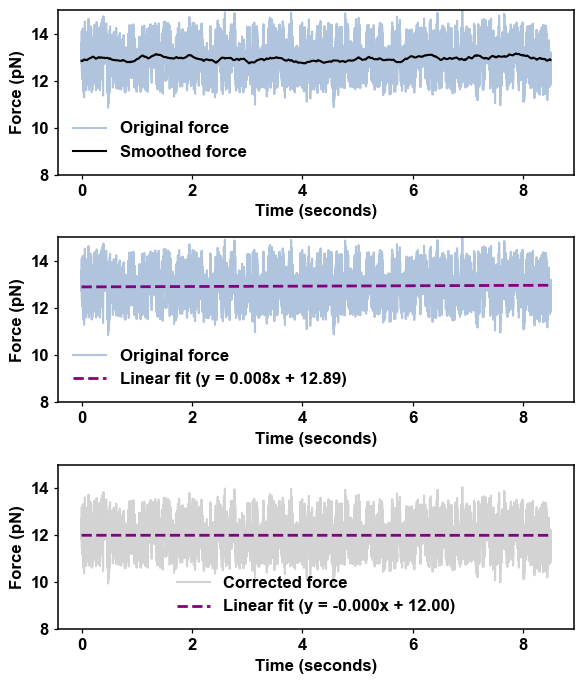

/var/folders/bx/bnn_g7856qsd3h0xm1_28v5c0000gn/T/ipykernel_50215/3308758118.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['force_corrected (pN)'] = force_corrected


In [35]:
file_corrected = linear_correction(file_cropped, window_size=1000, intercept_val = 12.00)

In [ ]:
file_corrected.to_csv('/formatted_file.csv')